# Illinois Excel Data Analysis with Pandas

This notebook demonstrates how to load and analyze the `Illinois.xlsx` file from the export folder using pandas.

## 1. Import Required Libraries
Import pandas and any other necessary libraries for data analysis.

In [34]:
!cd export

In [35]:
import pandas as pd
# If you need to display all columns:
pd.set_option('display.max_columns', None)

## 2. Load the Excel File
Use pandas' `read_excel` function to load the 'Illinois.xlsx' file into a DataFrame.

In [36]:
# Load the CSV file
file_path = 'c:/Users/osmon/Desktop/custom_data/export/Illinois.csv'

# Skip the first two rows and use the third row as the header
df = pd.read_csv(file_path, header=2)

# Clean up column names by stripping any extra whitespace
df.columns = df.columns.str.strip()

# Remove the last row if it's problematic (as seen in the file summary)
if df.iloc[-1]['State'] == '98 Special Classification Provisions, Nesoi':
    df = df.iloc[:-1]


df.head()

,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
0,Illinois,01 Live Animals,Africa,Jul-16,"7,185","7,185",6,6
1,Illinois,01 Live Animals,Africa,Feb-20,"13,792",NaN,494,NaN
2,Illinois,01 Live Animals,Asia - South,Jun-18,"15,087","15,087","1,422","1,422"
3,Illinois,01 Live Animals,Asia - Other,Mar-08,"12,515",NaN,"19,958",NaN
4,Illinois,01 Live Animals,Asia - Other,Jul-08,"12,135",NaN,"20,284",NaN


In [37]:
# Debug: Check file existence and list directory contents
import os

# Print current working directory
print("Current working directory:", os.getcwd())

# Check if file exists
print("File exists:", os.path.exists(file_path))

# List contents of the export directory
export_dir = 'c:/Users/osmon/Desktop/custom_data/export'
print("\nContents of export directory:")
if os.path.exists(export_dir):
    print(os.listdir(export_dir))
else:
    print("Export directory not found")

Current working directory: c:\Users\osmon\Desktop\custom_data
File exists: True

Contents of export directory:
['.DS_Store', 'Arkansas.csv', 'Illinois.csv', 'Iowa.csv', 'Louisiana.csv', 'Minnesota.csv', 'Mississippi.csv', 'Missouri.csv', 'Wisconsin.csv']


In [38]:
import os
print("File exists:", os.path.exists(file_path))

File exists: True


## 3. Explore the DataFrame
Display the first few rows, check the shape, and inspect column names and data types.

In [39]:
# Display the first 5 rows
print('First 5 rows:')
display(df.head())

# Shape of the DataFrame
print('Shape:', df.shape)

# Column names
print('Columns:', df.columns.tolist())

# Data types
print('Data types:')
print(df.dtypes)

First 5 rows:


,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
0,Illinois,01 Live Animals,Africa,Jul-16,"7,185","7,185",6,6
1,Illinois,01 Live Animals,Africa,Feb-20,"13,792",NaN,494,NaN
2,Illinois,01 Live Animals,Asia - South,Jun-18,"15,087","15,087","1,422","1,422"
3,Illinois,01 Live Animals,Asia - Other,Mar-08,"12,515",NaN,"19,958",NaN
4,Illinois,01 Live Animals,Asia - Other,Jul-08,"12,135",NaN,"20,284",NaN


Shape: (110711, 8)
Columns: ['State', 'Commodity', 'Country', 'Time', 'Vessel Value ($US)', 'Containerized Vessel Total Exports Value ($US)', 'Vessel SWT (kg)', 'Containerized Vessel Total Exports SWT (kg)']
Data types:
State                                             object
Commodity                                         object
Country                                           object
Time                                              object
Vessel Value ($US)                                object
Containerized Vessel Total Exports Value ($US)    object
Vessel SWT (kg)                                   object
Containerized Vessel Total Exports SWT (kg)       object
dtype: object


## 4. Basic Data Analysis with Pandas
Perform basic analysis such as summary statistics, value counts, and filtering rows.

In [40]:
# Summary statistics for numeric columns
print('Summary statistics:')
display(df.describe())

# Value counts for the first column (if categorical)
first_col = df.columns[0]
print(f'Value counts for {first_col}:')
display(df[first_col].value_counts())

# Example: Filter rows where the first column equals its first value
first_value = df[first_col].iloc[0]
filtered_df = df[df[first_col] == first_value]
print(f'Rows where {first_col} == {first_value}:')
display(filtered_df.head())

Summary statistics:


,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
count,110711,110711,110711,110711,110711,104171,110709,104170
unique,1,97,10,209,100259,93598,81052,75321
top,Illinois,"84 Nuclear Reactors, Boilers, Machinery Etc.; ...",Asia - Other,Mar-17,"10,000","10,000",1,"1,000"
freq,110711,1878,16835,563,87,67,71,71


Value counts for State:


State
Illinois    110711
Name: count, dtype: int64

Rows where State == Illinois:



,State,Commodity,Country,Time,Vessel Value ($US),Containerized Vessel Total Exports Value ($US),Vessel SWT (kg),Containerized Vessel Total Exports SWT (kg)
0,Illinois,01 Live Animals,Africa,Jul-16,"7,185","7,185",6,6
1,Illinois,01 Live Animals,Africa,Feb-20,"13,792",NaN,494,NaN
2,Illinois,01 Live Animals,Asia - South,Jun-18,"15,087","15,087","1,422","1,422"
3,Illinois,01 Live Animals,Asia - Other,Mar-08,"12,515",NaN,"19,958",NaN
4,Illinois,01 Live Animals,Asia - Other,Jul-08,"12,135",NaN,"20,284",NaN


## 5. Analyze Commodities and Export Amounts
Summarize the unique commodities and their total export amounts. Visualize the top commodities.

## 6. Modeling Ideas
Discuss possible predictive models and next steps for export data analysis.

Unique commodities:
['01 Live Animals' '02 Meat And Edible Meat Offal'
 '03 Fish, Crustaceans & Aquatic Invertebrates'
 '04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi'
 '05 Products Of Animal Origin, Nesoi'
 '06 Live Trees, Plants, Bulbs Etc.; Cut Flowers Etc.'
 '07 Edible Vegetables & Certain Roots & Tubers'
 '08 Edible Fruit & Nuts; Citrus Fruit Or Melon Peel'
 '09 Coffee, Tea, Mate & Spices' '10 Cereals'
 '11 Milling Products; Malt; Starch; Inulin; Wht Gluten'
 '12 Oil Seeds Etc.; Misc Grain, Seed, Fruit, Plant Etc'
 '13 Lac; Gums, Resins & Other Vegetable Sap & Extract'
 '14 Vegetable Plaiting Materials & Products Nesoi'
 '15 Animal, Vegetable Or Microbial Fats And Oils Etc'
 '16 Prep Of Meat,of Fish,of Crustaceans Etc,of Insects'
 '17 Sugars And Sugar Confectionary' '18 Cocoa And Cocoa Preparations'
 '19 Prep Cereal, Flour, Starch Or Milk; Bakers Wares'
 '20 Prep Vegetables, Fruit, Nuts Or Other Plant Parts'
 '21 Miscellaneous Edible Preparations'
 '22 Beverages, Spirits A

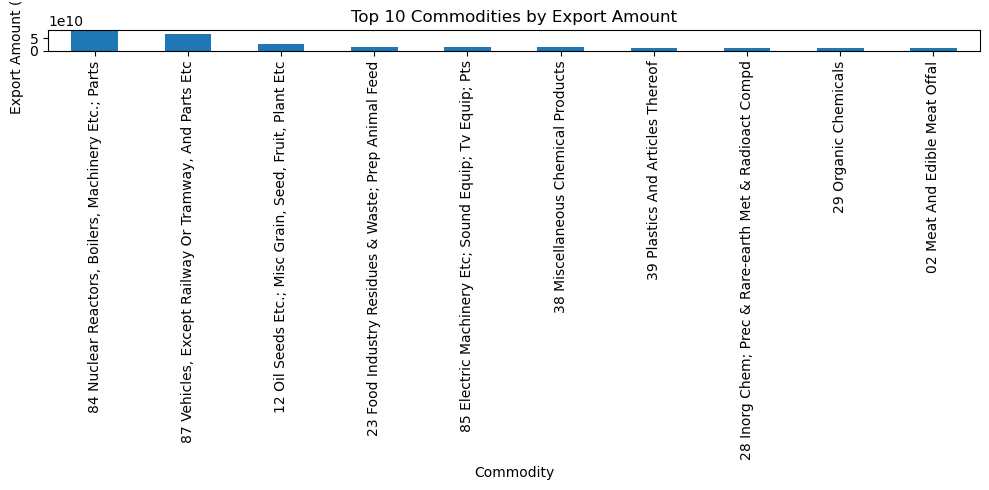

In [41]:
# Replace 'Commodity' and 'ExportAmount' with actual column names if different
commodity_col = 'Commodity'  # This is correct
amount_col = 'Vessel Value ($US)'  # Changed to the actual column name

# Convert the amount column to a numeric type, removing commas
df[amount_col] = pd.to_numeric(df[amount_col].str.replace(',', '', regex=False), errors='coerce')


# List unique commodities
print('Unique commodities:')
print(df[commodity_col].unique())

# Total export amount by commodity
top_commodities = df.groupby(commodity_col)[amount_col].sum().sort_values(ascending=False)
print('Top commodities by total export amount:')
print(top_commodities.head(10))

# Plot top 10 commodities
import matplotlib.pyplot as plt
top_commodities.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Commodities by Export Amount')
plt.ylabel('Export Amount ($US)')
plt.xlabel('Commodity')
plt.tight_layout()
plt.show()

## 7. Analyze Commodity Quantities and Rankings

In this section, we will calculate the total quantity of each commodity and rank them based on their quantities.

In [ ]:
# Replace 'Commodity' and 'Quantity' with actual column names if different
quantity_col = 'Vessel SWT (kg)'  # Changed to the actual column name for weight/quantity

# Convert the quantity column to numeric, removing commas if any
df[quantity_col] = pd.to_numeric(df[quantity_col].str.replace(',', '', regex=False), errors='coerce')

# Total quantity by commodity
total_quantities = df.groupby(commodity_col)[quantity_col].sum().sort_values(ascending=False)
print('Top commodities by total quantity (weight in kg):')
print(total_quantities.head(10))

# Plot top 10 commodities by quantity
total_quantities.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Commodities by Weight (kg)')
plt.ylabel('Total Weight (kg)')
plt.xlabel('Commodity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'Column not found: Quantity'

In [45]:
# Debug: Display column names to verify the correct column name for 'Quantity'
print("Column names in the DataFrame:", df.columns.tolist())

Column names in the DataFrame: ['State', 'Commodity', 'Country', 'Time', 'Vessel Value ($US)', 'Containerized Vessel Total Exports Value ($US)', 'Vessel SWT (kg)', 'Containerized Vessel Total Exports SWT (kg)']
